# Kiva Project

**(adapted from https://bit.ly/2J7G9f8)**

## PROBLEM:

### Context

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

Submissions in this challenge will take the form of Python data analysis.

Kiva has provided a dataset of loans issued over the 2014-2018 time period, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.

### Problem statement

For the locations in which Kiva has active loans, the objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

### Personal disclaimer

From a research perspective, the results obtained are never going to be a full representation of the realities that borrowers experience. It is meant to spark a discussion around how we can identify the welfare level of borrowers and improve them where we can.


## SOLUTION:

### Python Packages & Functions

Here we upload all the Python packages and datasets required for analysis.

In [1]:
# Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Data

#### 1. Original Data

In [2]:
loan_data = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//csvs//kiva-project//kiva_loans.csv')
location_data = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//csvs//kiva-project//kiva_mpi_region_locations.csv')
loan_themes  = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//csvs//kiva-project//loan_theme_ids.csv')
regional_lts = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//csvs//kiva-project//loan_themes_by_region.csv')

In [3]:
dfs = {'loan_data':loan_data, 'location_data':location_data,
       'loan_themes':loan_themes, 'regional_lts':regional_lts}

for key, val in dfs.items():
    print(str(key+' shape:'), val.shape)

loan_data shape: (671205, 20)
location_data shape: (2772, 9)
loan_themes shape: (779092, 4)
regional_lts shape: (15736, 21)


<br>

<u>**Descriptions of the original datasets**</u>
 
 There are four data sources provided by Kiva:

* ***loan_data***
    1. **id** - Unique ID for loan
    2. **funded_amount** - The amount disbursed by Kiva to the field agent (USD)
    3. **loan_amount** - The amount disbursed by the field agent to the borrower (USD)
    4. **activity** - More granular category
    5. **sector** - High level category
    6. **use** - Exact usage of loan amount
    7. **country_code** - ISO country code of country in which loan was disbursed
    8. **country** - Full country name of country in which loan was disbursed
    9. **region** - Full region name within the country
    10. **currency** - The currency in which the loan was disbursed
    11. **partner_id** - ID of partner organization
    12. **posted_time** - The time at which the loan is posted on Kiva by the field agent
    13. **disbursed_time** - The time at which the loan is disbursed by the field agent to the borrower
    14. **funded_time** - The time at which the loan posted to Kiva gets funded by lenders completely
    15. **term_in_months** - The duration for which the loan was disbursed in months
    16. **lender_count** - The total number of lenders that contributed to this loan
    17. **tags**
    18. **borrower_genders** - Comma separated M,F letters, where each instance represents a single male/female in the group
    19. **repayment_interval**
    20. **date**

* ***location_data***
    1. **LocationName** - region, country
    2. **ISO** - some sort of unique abbreviation for country
    3. **country** - country
    4. **region** - region within country
    5. **world_region** - parts of the world
    6. **MPI** - multidimensional poverty index
    7. **geo** - (latitude, longitude)
    8. **lat** - latitude
    9. **lon** - longitude

* ***loan_themes***
    1. **id** - Unique ID for loan (Loan ID)
    2. **Loan Theme ID** - ID for Loan Theme
    3. **Loan Theme Type** - Category name of type of loan
    4. **Partner ID**

* ***regional_lts***
    1. **Partner ID**
    2. **Field Partner Name**
    3. **sector**
    4. **Loan Theme ID**
    5. **Loan Theme Type**
    6. **country**
    7. **forkiva**
    8. **region**
    9. **geocode_old**
    10. **ISO**
    11. **number**
    12. **amount**
    13. **LocationName**
    14. **geocode**
    15. **names**
    16. **geo**
    17. **lat**
    18. **lon**
    19. **mpi_region**
    20. **mpi_geo**
    21. **rural_pct**

<br>

#### 2. Supplementary Data

In this section, we aim to gather the following data from the World Bank:

[Per Capita Expenditure (PCE)](https://www.quora.com/What-does-per-capita-expenditure-mean?share=1) for each country - this is the total market value of all purchases in a country divided by that country's total population (data: https://bit.ly/3blw0be)

In [4]:
PCE_data = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//csvs//kiva-project//PCE data.csv')

print('PCE data shape:',PCE_data.shape)

PCE data shape: (178, 62)


In [5]:
# add this dataset to the dictionary
dfs['PCE_data'] = PCE_data
dfs.keys()

dict_keys(['loan_data', 'location_data', 'loan_themes', 'regional_lts', 'PCE_data'])

<br>

#### Data Summary

In [6]:
for key, val in dfs.items():
    # 1. Get the summary table
    num_summary = val.describe()
    cat_summary = val.loc[:,val.dtypes==np.object].describe(include=['O'])
    # 2. Display it
    print('\nSUMMARY STATISTICS WITHOUT AGGREGATION: {}'.format(key),'\n')
    display(num_summary)
    print('\n')
    display(cat_summary)
    print('\n')


SUMMARY STATISTICS WITHOUT AGGREGATION: loan_data 



,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308





SUMMARY STATISTICS WITHOUT AGGREGATION: location_data 



,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


,LocationName,ISO,country,region,world_region,geo
count,984,1008,1008,984,1008,2772
unique,984,102,102,928,6,881
top,"Piauð, Brazil",NGA,Nigeria,Central,Sub-Saharan Africa,"(1000.0, 1000.0)"
freq,1,37,37,8,432,1880





SUMMARY STATISTICS WITHOUT AGGREGATION: loan_themes 



,id,Partner ID
count,7.790920e+05,764279.000000
mean,1.047475e+06,180.825840
std,2.282538e+05,97.914029
min,6.386310e+05,9.000000
25%,8.499768e+05,126.000000
50%,1.046528e+06,145.000000
75%,1.244768e+06,204.000000
max,1.444243e+06,557.000000


,Loan Theme ID,Loan Theme Type
count,764279,764279
unique,956,203
top,a1050000000wf0q,General
freq,110264,380693





SUMMARY STATISTICS WITHOUT AGGREGATION: regional_lts 



,Partner ID,number,amount,lat,lon,rural_pct
count,15736.000000,15736.000000,1.573600e+04,13662.000000,13662.000000,14344.000000
mean,191.376144,53.628432,2.003991e+04,14.328878,29.433569,68.084635
std,118.705003,403.079799,9.636941e+04,16.757689,83.255739,26.550064
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,9.500000e+02,6.266728,-71.967463,60.000000
50%,154.000000,4.000000,2.600000e+03,13.484101,41.899993,73.000000
75%,217.000000,15.000000,8.750000e+03,22.189940,106.677321,85.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,LocationName,geocode,names,geo,mpi_region,mpi_geo
count,15736,15736,15736,15736,15736,15736,15736,1200,15722,15736,13662,13661,15736,15722,9671
unique,302,11,718,170,79,2,9526,340,77,9561,6557,6275,6558,392,335
top,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,Chouf,"(-1.2833333, 36.8166667)",PHL,"Chouf, Lebanon","[(19.7126764, 105.8393447)]",Philippines,"(1000.0, 1000.0)","Northern Mindanao, Philippines","(8.020163499999999, 124.6856509)"
freq,1207,13679,1152,5661,3467,13211,25,20,3467,25,43,137,2074,1174,1174





SUMMARY STATISTICS WITHOUT AGGREGATION: PCE_data 



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 60
count,42.000000,43.000000,44.000000,44.000000,46.000000,49.000000,50.000000,51.000000,51.000000,52.000000,...,178.000000,165.000000,164.000000,163.000000,161.000000,159.000000,158.000000,156.000000,147.000000,0.0
mean,1809.494762,1847.716977,1877.875227,1940.011136,2015.650652,2010.033673,2288.681000,2320.084902,2392.880000,2671.819423,...,7432.308315,7394.381152,7501.210305,7620.346564,7789.201615,7952.960314,8114.411582,8357.417692,8682.582653,NaN
std,2328.596444,2368.869204,2396.605752,2484.395372,2564.813108,2590.874723,3100.951093,3202.102899,3313.045327,3692.897134,...,9241.753759,8860.780457,8887.466955,8930.195998,9055.941821,9209.450015,9352.514087,9508.928613,9765.671221,NaN
min,5.400000,5.460000,6.260000,7.100000,7.600000,7.830000,8.960000,8.720000,8.820000,9.000000,...,189.820000,198.280000,199.700000,213.930000,215.140000,204.180000,194.430000,188.640000,189.160000,NaN
25%,638.492500,615.280000,586.805000,615.527500,574.932500,524.920000,570.900000,577.155000,583.605000,581.315000,...,1038.437500,1071.930000,1175.210000,1257.215000,1326.620000,1312.475000,1439.117500,1523.852500,1552.660000,NaN
50%,947.700000,958.810000,1090.455000,1131.675000,1166.285000,1056.250000,1181.270000,1233.510000,1212.540000,1266.920000,...,3180.270000,3264.480000,3280.025000,3569.600000,3813.130000,3945.950000,4085.135000,4403.790000,4579.960000,NaN
75%,2022.472500,2058.570000,2096.865000,2161.477500,2315.760000,2330.140000,2511.492500,2537.875000,2602.420000,2824.700000,...,9308.487500,8833.490000,9080.125000,9492.310000,9691.510000,10008.145000,10458.250000,10925.800000,11395.550000,NaN
max,10350.000000,10847.400000,11143.700000,11568.600000,11941.800000,12326.700000,13818.600000,14632.700000,15066.200000,15839.300000,...,48546.600000,40030.900000,40534.200000,41121.300000,41139.500000,41384.100000,41516.800000,41636.300000,41717.200000,NaN


,Unnamed: 0,region
count,178,178
unique,178,7
top,Benin,Sub-Saharan Africa
freq,1,44


### Exploratory Data Analysis

#### The impact of KIVA donors

In this section, we seek to explore the data to answer certain questions around KIVA donor contributions

1. How much of the total loan amount has Kiva financed?



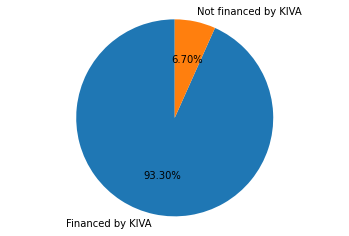

In [7]:
print("1. How much of the total loan amount has Kiva financed?\n")

# 1. Calculate the percentage of loan requests that have been funded
percentage1 = (loan_data.funded_amount.sum()/loan_data.loan_amount.sum())*100
percentage1 = round(percentage1, 2)

# 2. Display the result
status = ['Financed by KIVA','Not financed by KIVA']
values = [percentage1, (100-percentage1)]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=status,
        autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

2. How much money have Kiva donors contributed over time?


 DAILY CONTRIBUTIONS OF KIVA DONORS AS A COLLECTIVE


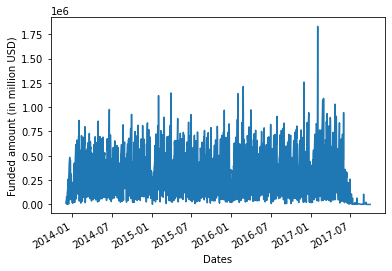

In [10]:
print("2. How much money have Kiva donors contributed over time?\n")
print('\n', 'DAILY CONTRIBUTIONS OF KIVA DONORS AS A COLLECTIVE')
# convert datetime values to appropriate formats
loan_data['posted_time'] = loan_data['posted_time'].astype('datetime64')
loan_data['disbursed_time'] = loan_data['disbursed_time'].astype('datetime64')
loan_data['funded_time'] = loan_data['funded_time'].astype('datetime64')

# pick out dates
loan_data.loc[:,'disbursement_date'] = loan_data['disbursed_time'].dt.date

# create a pivot-table
tab1 = pd.pivot_table(loan_data, values='funded_amount', index=['disbursement_date'], aggfunc='sum')

# plot this table
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots()
ax.plot(tab1.index, tab1['funded_amount'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# declare the title and show the completed graph
plt.xlabel('Dates')
plt.ylabel('Funded amount (in million USD)')
plt.show()